In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
crypto_currency = 'BTC'
againist_currency = 'USD'
stock = crypto_currency + '-' + againist_currency

In [3]:
end = datetime.now()
start = datetime(2016,1,1)
stock_data = yf.download(stock, start=start, end = end)

[*********************100%***********************]  1 of 1 completed


In [4]:

stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2016-01-01,434.334015,436.246002,427.515015,430.721008,36278900
2016-01-02,433.437988,436.062012,431.869995,434.622009,30096600
2016-01-03,430.010986,433.743011,424.705994,433.578003,39633800
2016-01-04,433.091003,434.516998,429.084015,430.061005,38477500
2016-01-05,431.959991,434.182007,429.675995,433.069000,34522600


In [5]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3297.000000,3297.000000,3297.000000,3297.000000,3.297000e+03
mean,22553.150640,23032.344367,21998.735012,22526.718609,2.129957e+10
std,22639.990462,23102.983232,22104.799736,22612.637238,2.043684e+10
min,364.330994,374.950012,354.914001,365.072998,2.851400e+07
25%,5572.362305,5744.350098,5394.217285,5571.508301,4.602200e+09
50%,11384.181641,11656.700195,11094.145508,11381.020508,1.810042e+10
75%,37002.441406,37896.734375,35670.972656,36944.804688,3.184701e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3297 entries, 2016-01-01 to 2025-01-09
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3297 non-null   float64
 1   (High, BTC-USD)    3297 non-null   float64
 2   (Low, BTC-USD)     3297 non-null   float64
 3   (Open, BTC-USD)    3297 non-null   float64
 4   (Volume, BTC-USD)  3297 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.5 KB


In [7]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
closing_price = stock_data[['Close']]
closing_price['Close']

Ticker,BTC-USD
Date,
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
2016-01-05,431.959991
...,...
2025-01-05,98314.960938
2025-01-06,102078.085938
2025-01-07,96922.703125


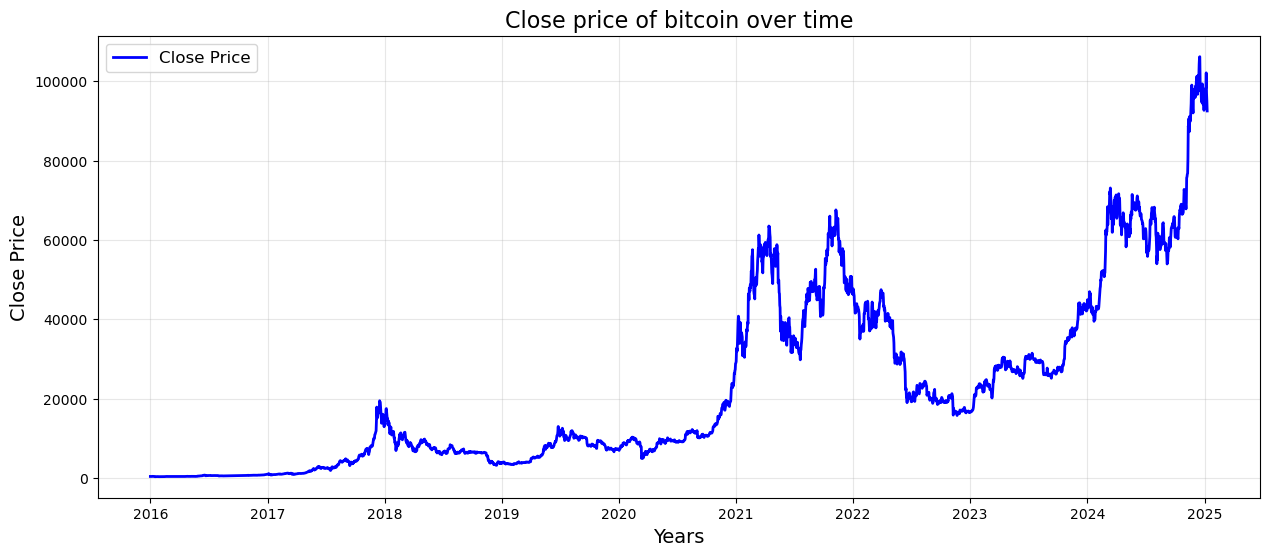

In [9]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [10]:
# scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())
len(scaled_data)

3297

In [25]:
# Preparing data for lstm

X_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    X_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
X_data = np.array(X_data)
y_data = np.array(y_data)

In [26]:
# Split into train and test sets
train_size = int(len(X_data) * 0.9)
X_train , y_train = X_data[:train_size], y_data[:train_size]
X_test, y_test = X_data[train_size:], y_data[train_size:]

In [28]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

c:\Users\sasan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(X_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - loss: 0.0012
Epoch 2/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 3.1457e-04
Epoch 3/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 2.0116e-04
Epoch 4/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 1.7222e-04
Epoch 5/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 1.5685e-04
Epoch 6/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 1.1742e-04
Epoch 7/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 1.0354e-04
Epoch 8/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 1.3909e-04
Epoch 9/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - loss: 1.2437e-04
Epoch 10/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 1.3461e-04
Epoch 11/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 9.9919e-05
Epoch 12/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 1.0791e-04
Epoch 13/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 1.1414e-04
Epoch 14/20
576/576 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/s

In [31]:
predictions = model.predict(X_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


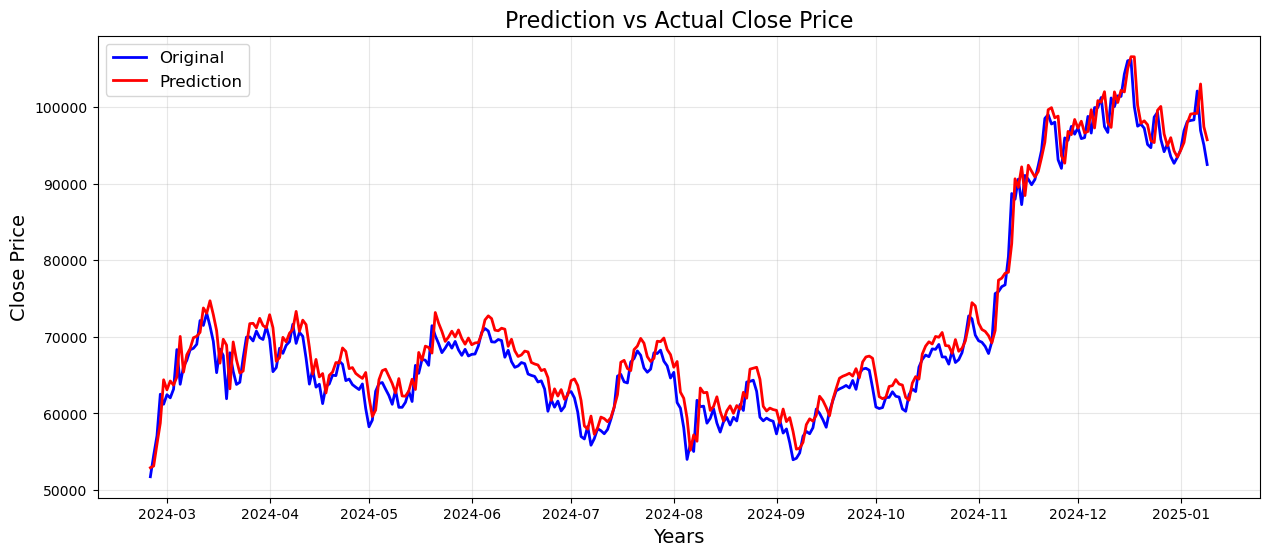

In [32]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [33]:

# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


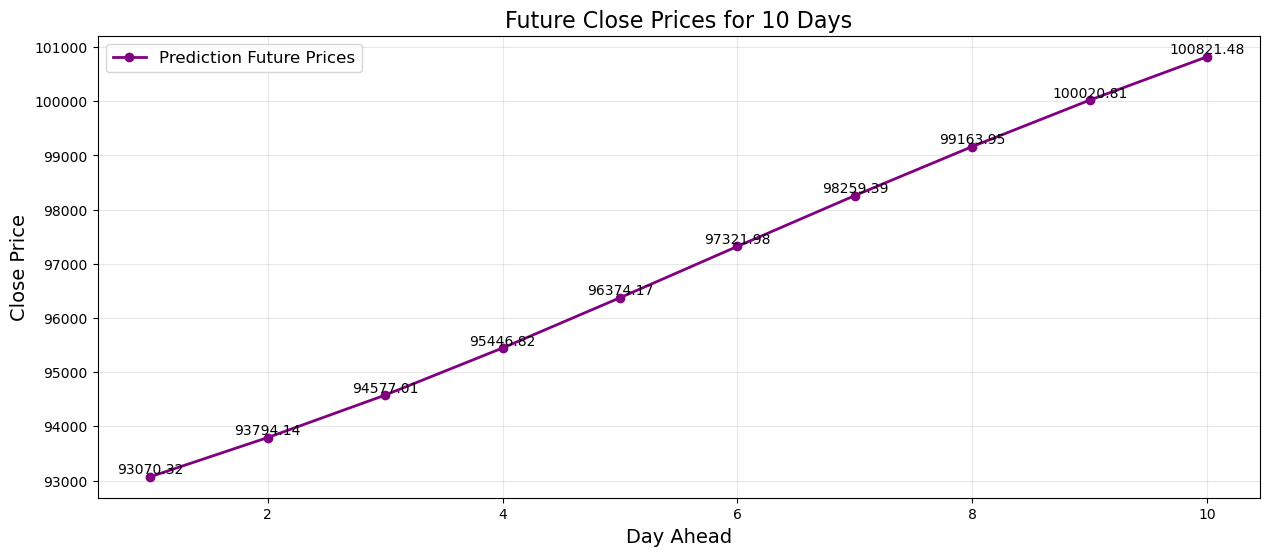

In [35]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [36]:
model.save("model.keras")